In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/largest-malls/Largest-Malls.csv


## Importing Libraries

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

## Loading Dataset

In [3]:
df = pd.read_csv('/kaggle/input/largest-malls/Largest-Malls.csv')

In [4]:
pd.set_option('display.max_rows',10)

In [5]:
df

,Rank,Mall,Country,City (metropolitan area),Year opened,Gross leasable area (GLA),Shops
0,1,Iran Mall,Iran,Tehran,2018,"1,950,000 m2 (21,000,000 sq ft)","2,500"
1,2,IOI City Mall,Malaysia,Putrajaya,2014,"821,000 m2 (8,840,000 sq ft)",650
2,3,South China Mall,China,Dongguan,2005,"659,612 m2 (7,100,000 sq ft)","2,350"
3,4,Isfahan City Center,Iran,Isfahan,2012,"650,000 m2 (7,000,000 sq ft)",350
4,5,SM Mall of Asia,Philippines,Pasay (Metro Manila),2006,"589,891 m2 (6,349,530 sq ft)","3,500"
...,...,...,...,...,...,...,...
51,50,Aventura Mall,United States,Aventura (Miami area),1983,"250,000 m2 (2,700,000 sq ft)",300
52,50,Glorietta,Philippines,Makati (Metro Manila),1991,"250,000 m2 (2,700,000 sq ft)",300
53,50,Greenbelt,Philippines,Makati (Metro Manila),1991,"250,000 m2 (2,700,000 sq ft)",300
54,50,South Coast Plaza,United States,Costa Mesa (Greater Los Angeles),1967,"250,000 m2 (2,700,000 sq ft)",286


## Formatting Dataset

**Splitting GLA Column**

In [6]:
df['Gross leasable area (GLA) in m2']=df['Gross leasable area (GLA)'].str.split("m2",expand=True)[0]

In [7]:
df['Gross leasable area (GLA) in sq ft']=df['Gross leasable area (GLA)'].str.split("m2",expand=True)[1]

In [8]:
new_value = list()
for i in df['Gross leasable area (GLA) in sq ft']:
    new_value.append(i[2:len(i)-8])
df['Gross leasable area (GLA) in sq ft']=new_value

In [9]:
df

,Rank,Mall,Country,City (metropolitan area),Year opened,Gross leasable area (GLA),Shops,Gross leasable area (GLA) in m2,Gross leasable area (GLA) in sq ft
0,1,Iran Mall,Iran,Tehran,2018,"1,950,000 m2 (21,000,000 sq ft)","2,500","1,950,000","21,000,00"
1,2,IOI City Mall,Malaysia,Putrajaya,2014,"821,000 m2 (8,840,000 sq ft)",650,"821,000","8,840,00"
2,3,South China Mall,China,Dongguan,2005,"659,612 m2 (7,100,000 sq ft)","2,350","659,612","7,100,00"
3,4,Isfahan City Center,Iran,Isfahan,2012,"650,000 m2 (7,000,000 sq ft)",350,"650,000","7,000,00"
4,5,SM Mall of Asia,Philippines,Pasay (Metro Manila),2006,"589,891 m2 (6,349,530 sq ft)","3,500","589,891","6,349,53"
...,...,...,...,...,...,...,...,...,...
51,50,Aventura Mall,United States,Aventura (Miami area),1983,"250,000 m2 (2,700,000 sq ft)",300,"250,000","2,700,00"
52,50,Glorietta,Philippines,Makati (Metro Manila),1991,"250,000 m2 (2,700,000 sq ft)",300,"250,000","2,700,00"
53,50,Greenbelt,Philippines,Makati (Metro Manila),1991,"250,000 m2 (2,700,000 sq ft)",300,"250,000","2,700,00"
54,50,South Coast Plaza,United States,Costa Mesa (Greater Los Angeles),1967,"250,000 m2 (2,700,000 sq ft)",286,"250,000","2,700,00"


In [10]:
df.drop('Gross leasable area (GLA)',axis=1,inplace=True)

In [11]:
df

,Rank,Mall,Country,City (metropolitan area),Year opened,Shops,Gross leasable area (GLA) in m2,Gross leasable area (GLA) in sq ft
0,1,Iran Mall,Iran,Tehran,2018,"2,500","1,950,000","21,000,00"
1,2,IOI City Mall,Malaysia,Putrajaya,2014,650,"821,000","8,840,00"
2,3,South China Mall,China,Dongguan,2005,"2,350","659,612","7,100,00"
3,4,Isfahan City Center,Iran,Isfahan,2012,350,"650,000","7,000,00"
4,5,SM Mall of Asia,Philippines,Pasay (Metro Manila),2006,"3,500","589,891","6,349,53"
...,...,...,...,...,...,...,...,...
51,50,Aventura Mall,United States,Aventura (Miami area),1983,300,"250,000","2,700,00"
52,50,Glorietta,Philippines,Makati (Metro Manila),1991,300,"250,000","2,700,00"
53,50,Greenbelt,Philippines,Makati (Metro Manila),1991,300,"250,000","2,700,00"
54,50,South Coast Plaza,United States,Costa Mesa (Greater Los Angeles),1967,286,"250,000","2,700,00"


## Dealing With Data Types

In [12]:
df.dtypes

Rank                                   int64
Mall                                  object
Country                               object
City (metropolitan area)              object
Year opened                           object
Shops                                 object
Gross leasable area (GLA) in m2       object
Gross leasable area (GLA) in sq ft    object
dtype: object

**Removing ',' from numeric values**

In [13]:
col_list = ['Shops','Gross leasable area (GLA) in m2','Gross leasable area (GLA) in sq ft']
new_col = list()
for i in col_list:
    for j in df[i]:
        new_col.append(j.replace(',',''))
    df[i]=new_col
    new_col =[]

In [14]:
df

,Rank,Mall,Country,City (metropolitan area),Year opened,Shops,Gross leasable area (GLA) in m2,Gross leasable area (GLA) in sq ft
0,1,Iran Mall,Iran,Tehran,2018,2500,1950000,2100000
1,2,IOI City Mall,Malaysia,Putrajaya,2014,650,821000,884000
2,3,South China Mall,China,Dongguan,2005,2350,659612,710000
3,4,Isfahan City Center,Iran,Isfahan,2012,350,650000,700000
4,5,SM Mall of Asia,Philippines,Pasay (Metro Manila),2006,3500,589891,634953
...,...,...,...,...,...,...,...,...
51,50,Aventura Mall,United States,Aventura (Miami area),1983,300,250000,270000
52,50,Glorietta,Philippines,Makati (Metro Manila),1991,300,250000,270000
53,50,Greenbelt,Philippines,Makati (Metro Manila),1991,300,250000,270000
54,50,South Coast Plaza,United States,Costa Mesa (Greater Los Angeles),1967,286,250000,270000


**Converting numeric values into int type**

In [15]:
df[['Shops','Gross leasable area (GLA) in m2','Gross leasable area (GLA) in sq ft']]=df[['Shops','Gross leasable area (GLA) in m2','Gross leasable area (GLA) in sq ft']].astype('int')

In [16]:
df

,Rank,Mall,Country,City (metropolitan area),Year opened,Shops,Gross leasable area (GLA) in m2,Gross leasable area (GLA) in sq ft
0,1,Iran Mall,Iran,Tehran,2018,2500,1950000,2100000
1,2,IOI City Mall,Malaysia,Putrajaya,2014,650,821000,884000
2,3,South China Mall,China,Dongguan,2005,2350,659612,710000
3,4,Isfahan City Center,Iran,Isfahan,2012,350,650000,700000
4,5,SM Mall of Asia,Philippines,Pasay (Metro Manila),2006,3500,589891,634953
...,...,...,...,...,...,...,...,...
51,50,Aventura Mall,United States,Aventura (Miami area),1983,300,250000,270000
52,50,Glorietta,Philippines,Makati (Metro Manila),1991,300,250000,270000
53,50,Greenbelt,Philippines,Makati (Metro Manila),1991,300,250000,270000
54,50,South Coast Plaza,United States,Costa Mesa (Greater Los Angeles),1967,286,250000,270000


## Data Analysis : Best Performing Country : Largest-Malls Dataset

In [17]:
malls_country = df.pivot_table(values='Gross leasable area (GLA) in m2',index='Country',aggfunc=np.count_nonzero).sort_values('Gross leasable area (GLA) in m2',ascending=False)
malls_country.rename(columns={'Gross leasable area (GLA) in m2':'Count of Malls in Largest 50 World'},inplace=True)
malls_country

,Count of Malls in Largest 50 World
Country,
Philippines,10
China,7
Thailand,6
United States,5
Indonesia,5
...,...
Russia,1
Bangladesh,1
Kuwait,1


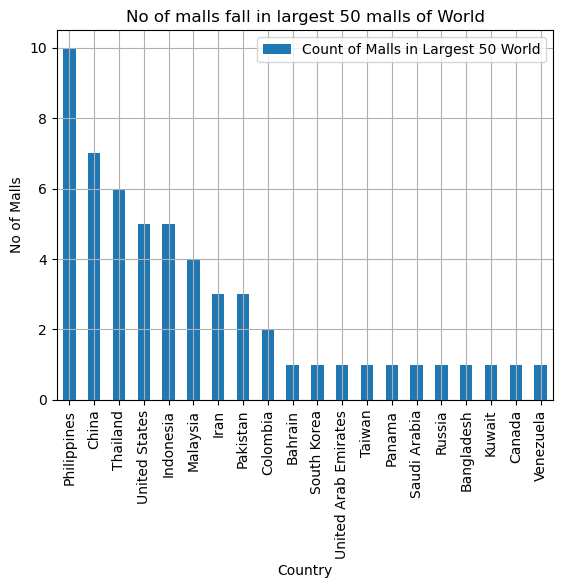

In [18]:
malls_country.plot(kind='bar',title='No of malls fall in largest 50 malls of World',xlabel='Country',ylabel='No of Malls',grid=True)
plt.show()

## Observations 1

<h4>Main Contributors according to no of malls are Philippines, China, Thiland, United States, Indonesia,   Malaysia, Iran, Pakistan, Columbia.</h4>

 <h4>But, we need to check mean area of malls country wise to get more insights.</h4>

In [19]:
malls_country_area = df.pivot_table(values='Gross leasable area (GLA) in m2',index='Country',aggfunc=np.mean).sort_values('Gross leasable area (GLA) in m2',ascending=False)
malls_country_area.rename(columns={'Gross leasable area (GLA) in m2':'Mean Area in m2'},inplace=True)
malls_country_area

,Mean Area in m2
Country,
Iran,1.016667e+06
Malaysia,5.150820e+05
Thailand,4.625463e+05
China,4.602901e+05
Kuwait,4.250000e+05
...,...
Bahrain,2.730000e+05
Colombia,2.650000e+05
Saudi Arabia,2.610000e+05


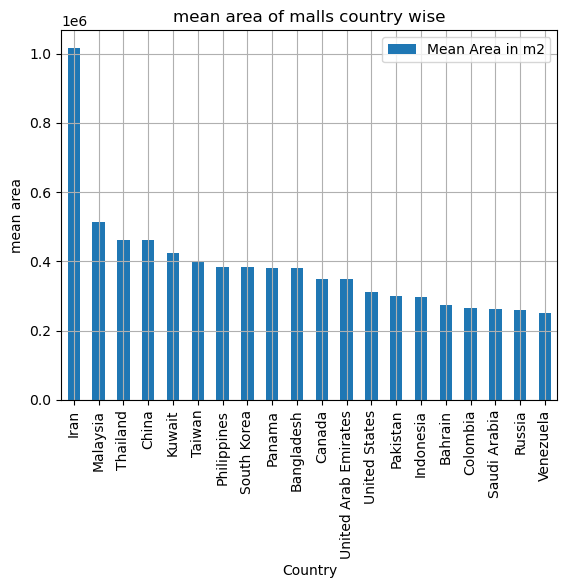

In [20]:
malls_country_area.plot(kind='bar',title='mean area of malls country wise',xlabel='Country',ylabel='mean area',grid=True)
plt.show()

## Observations 2

<h4>Main Contributors according to mean area  are Iran, Malaysia, Thailand, China, Kuwait,Taiwan. I am not including other countries becuause they have almost same mean area.</h4>

 <h4>But, we need to check another factor "Average No of Shops".</h4>

In [21]:
shops_country = df.pivot_table(values='Shops',index='Country',aggfunc=np.mean).sort_values('Shops',ascending=False)
shops_country.rename(columns={'Shops':'Average number of Shops'},inplace=True)
shops_country

,Average number of Shops
Country,
Kuwait,1100.000000
Iran,1068.333333
China,1032.857143
Philippines,833.000000
Canada,800.000000
...,...
Bangladesh,200.000000
Colombia,200.000000
Panama,200.000000


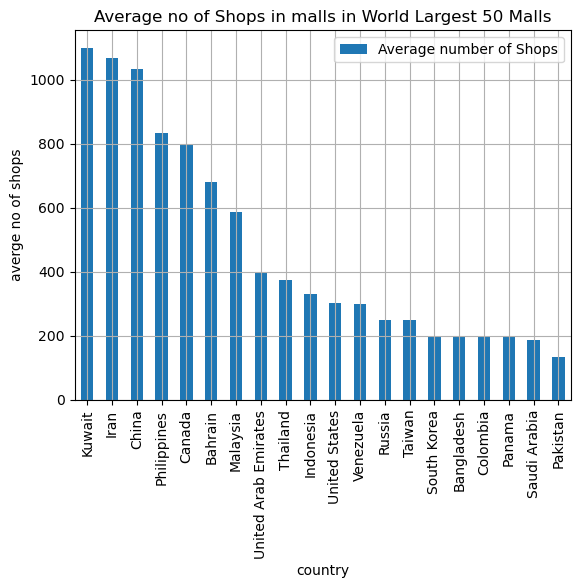

In [22]:
shops_country.plot(kind='bar',title='Average no of Shops in malls in World Largest 50 Malls',xlabel='country',ylabel='averge no of shops',grid=True)
plt.show()

## Observations 3

<h4>Main Contributors according to  average number of shops are Kuwait, Iran , China, Philippines, Canada , Bahrain, Malaysia.</h4>

## Best Performing Country

In [23]:
print(malls_country_area[0:5])
print(malls_country[0:5])
print(shops_country[0:5])

          Mean Area in m2
Country                  
Iran         1.016667e+06
Malaysia     5.150820e+05
Thailand     4.625463e+05
China        4.602901e+05
Kuwait       4.250000e+05
               Count of Malls in Largest 50 World
Country                                          
Philippines                                    10
China                                           7
Thailand                                        6
United States                                   5
Indonesia                                       5
             Average number of Shops
Country                             
Kuwait                   1100.000000
Iran                     1068.333333
China                    1032.857143
Philippines               833.000000
Canada                    800.000000


**As we can see , China is 4th in Mean Area of Malls, 2nd in Count of Malls, 3rd in Average number of Shops. So we can say Best Performing Country in World Largest 50 malls is China.**
